In [88]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from os import path
from fantasyfootball import config
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
DATA_DIR = r'..\data\game-by-game'
year_list = [str(year) + '_weekly.csv' for year in range(2017, 2020+1)]
file_list = [path.join(DATA_DIR, year) for year in year_list]

In [137]:
df = pd.concat([pd.read_csv(file) for file in file_list])

In [138]:
df.head()

,player_id,player_name,pos,year,date,week,age,tm,home/away,opp,...,rushing_td,receiving_tgt,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt,scoring_2pm,fumbles,fumbles_lost
0,GurlTo01,Todd Gurley,RB,2017,2017-09-10,1.0,23.038,LAR,Home,IND,...,1.0,6.0,5.0,56.0,11.20,0.0,9.33,0.0,1.0,0.0
1,GurlTo01,Todd Gurley,RB,2017,2017-09-17,2.0,23.045,LAR,Home,WAS,...,1.0,4.0,3.0,48.0,16.00,1.0,12.00,0.0,2.0,1.0
2,GurlTo01,Todd Gurley,RB,2017,2017-09-21,3.0,23.049,LAR,Away,SFO,...,2.0,7.0,5.0,36.0,7.20,1.0,5.14,0.0,1.0,0.0
3,GurlTo01,Todd Gurley,RB,2017,2017-10-01,4.0,23.059,LAR,Away,DAL,...,0.0,8.0,7.0,94.0,13.43,1.0,11.75,0.0,0.0,0.0
4,GurlTo01,Todd Gurley,RB,2017,2017-10-08,5.0,23.066,LAR,Home,SEA,...,0.0,4.0,2.0,7.0,3.50,0.0,1.75,0.0,1.0,1.0


In [139]:
df.tail()

,player_id,player_name,pos,year,date,week,age,tm,home/away,opp,...,rushing_td,receiving_tgt,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt,scoring_2pm,fumbles,fumbles_lost
3303,HastJa02,Jamycal Hasty,RB,2020,2020-10-18,6.0,24.036,SFO,Home,LAR,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3304,HastJa02,Jamycal Hasty,RB,2020,2020-10-25,7.0,24.043,SFO,Away,NWE,...,0.0,1.0,1.0,16.0,16.0,0.0,16.0,0.0,0.0,0.0
3305,HastJa02,Jamycal Hasty,RB,2020,2020-11-01,8.0,24.050,SFO,Away,SEA,...,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0
3306,HastJa02,Jamycal Hasty,RB,2020,2020-11-05,9.0,24.054,SFO,Home,GNB,...,0.0,2.0,2.0,10.0,5.0,0.0,5.0,0.0,0.0,0.0
3307,HastJa02,Jamycal Hasty,RB,2020,2020-11-15,10.0,24.064,SFO,Away,NOR,...,0.0,2.0,2.0,-4.0,-2.0,0.0,-2.0,0.0,0.0,0.0


In [99]:
df.dtypes

player_id           object
player_name         object
pos                 object
year                 int64
date                object
week               float64
age                float64
tm                  object
home/away           object
opp                 object
result              object
passing_cmp        float64
passing_att        float64
passing_yds        float64
passing_td         float64
passing_int        float64
passing_rate       float64
passing_sk         float64
passing_y/a        float64
passing_ay/a       float64
rushing_att        float64
rushing_yds        float64
rushing_y/a        float64
rushing_td         float64
receiving_tgt      float64
receiving_rec      float64
receiving_yds      float64
receiving_y/r      float64
receiving_td       float64
receiving_y/tgt    float64
scoring_2pm        float64
fumbles            float64
fumbles_lost       float64
dtype: object

In [100]:
df.isna().sum()

player_id          0
player_name        0
pos                0
year               0
date               0
week               0
age                0
tm                 0
home/away          0
opp                0
result             0
passing_cmp        0
passing_att        0
passing_yds        0
passing_td         0
passing_int        0
passing_rate       0
passing_sk         0
passing_y/a        0
passing_ay/a       0
rushing_att        0
rushing_yds        0
rushing_y/a        0
rushing_td         0
receiving_tgt      0
receiving_rec      0
receiving_yds      0
receiving_y/r      0
receiving_td       0
receiving_y/tgt    0
scoring_2pm        0
fumbles            0
fumbles_lost       0
dtype: int64

In [143]:
df = df.pipe(config.pro_football_reference_pts)

In [144]:
df.head()

,player_id,player_name,pos,year,date,week,age,tm,home/away,opp,...,receiving_tgt,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt,scoring_2pm,fumbles,fumbles_lost,ppr_custom_pts
0,GurlTo01,Todd Gurley,RB,2017,2017-09-10,1.0,23.038,LAR,Home,IND,...,6.0,5.0,56.0,11.20,0.0,9.33,0.0,1.0,0.0,19.6
1,GurlTo01,Todd Gurley,RB,2017,2017-09-17,2.0,23.045,LAR,Home,WAS,...,4.0,3.0,48.0,16.00,1.0,12.00,0.0,2.0,1.0,24.6
2,GurlTo01,Todd Gurley,RB,2017,2017-09-21,3.0,23.049,LAR,Away,SFO,...,7.0,5.0,36.0,7.20,1.0,5.14,0.0,1.0,0.0,36.9
3,GurlTo01,Todd Gurley,RB,2017,2017-10-01,4.0,23.059,LAR,Away,DAL,...,8.0,7.0,94.0,13.43,1.0,11.75,0.0,0.0,0.0,34.5
4,GurlTo01,Todd Gurley,RB,2017,2017-10-08,5.0,23.066,LAR,Home,SEA,...,4.0,2.0,7.0,3.50,0.0,1.75,0.0,1.0,1.0,4.0


In [103]:
df['year'].value_counts()

2017    4073
2019    4036
2018    4007
2020    3308
Name: year, dtype: int64

In [110]:
player_list = ['Chris Carson', 'Miles Sanders', 'Michael Thomas', 'Robert Woods', 'Stefon Diggs']

In [141]:
def make_kde_plot(df, player_list):
    fig, ax = plt.subplots(figsize=(20, 15))
    
    list_len = len(player_list)
    cmap = cm.get_cmap('gist_rainbow')
    color_list = cmap(np.linspace(0,.8,list_len))
    
    for player, color in zip(player_list, color_list):
        df_ = df.loc[df['player_name'].isin([player])]
        sns.kdeplot(df_['ppr_custom_pts'], color=color, ax=ax, shade=True, label=player)
        
    ax.grid(zorder=0,alpha=.4)
    ax.tick_params(labelsize=14)
    ax.set_xlabel('Fantasy Points Per Game', fontsize=16)
    ax.set_ylabel('Probability', fontsize=16)
    ax.legend(fontsize=14)

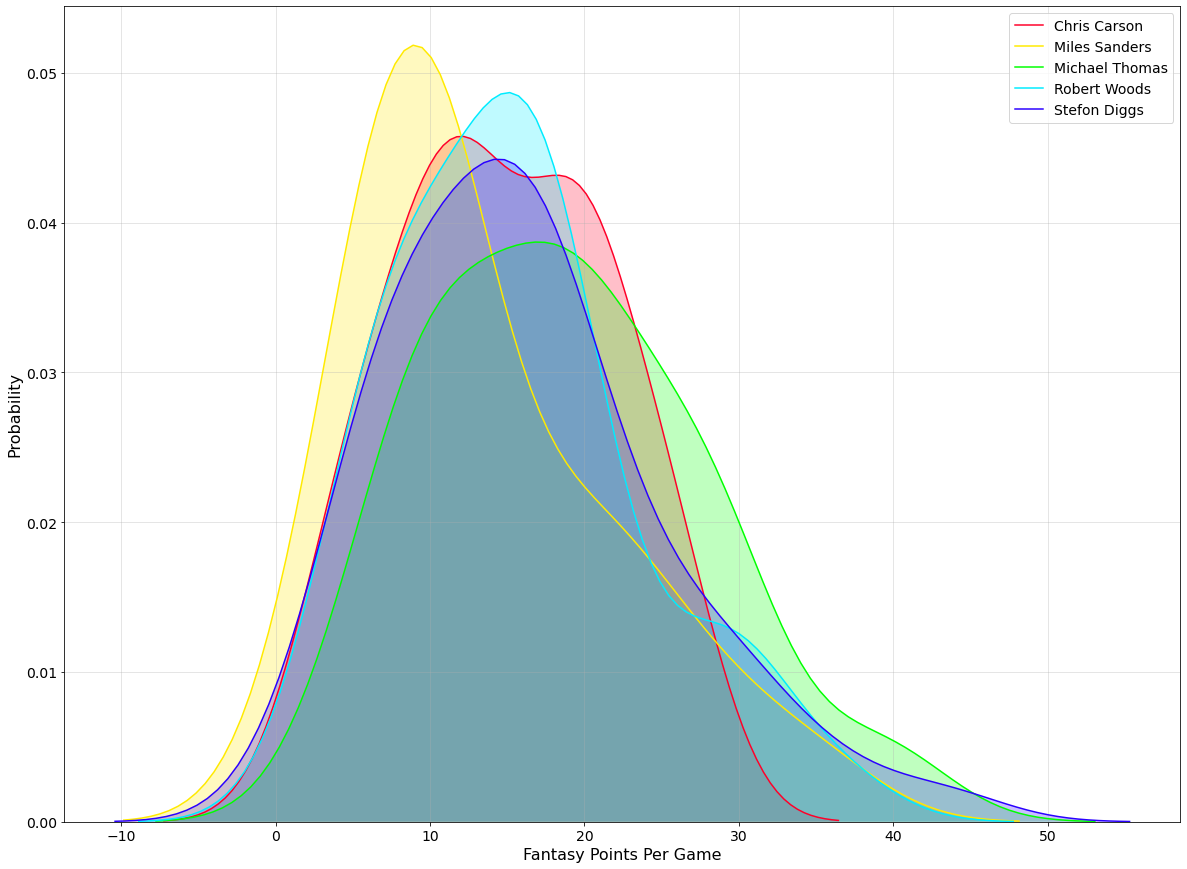

In [145]:
# data from 2017-2020
make_kde_plot(df, player_list)

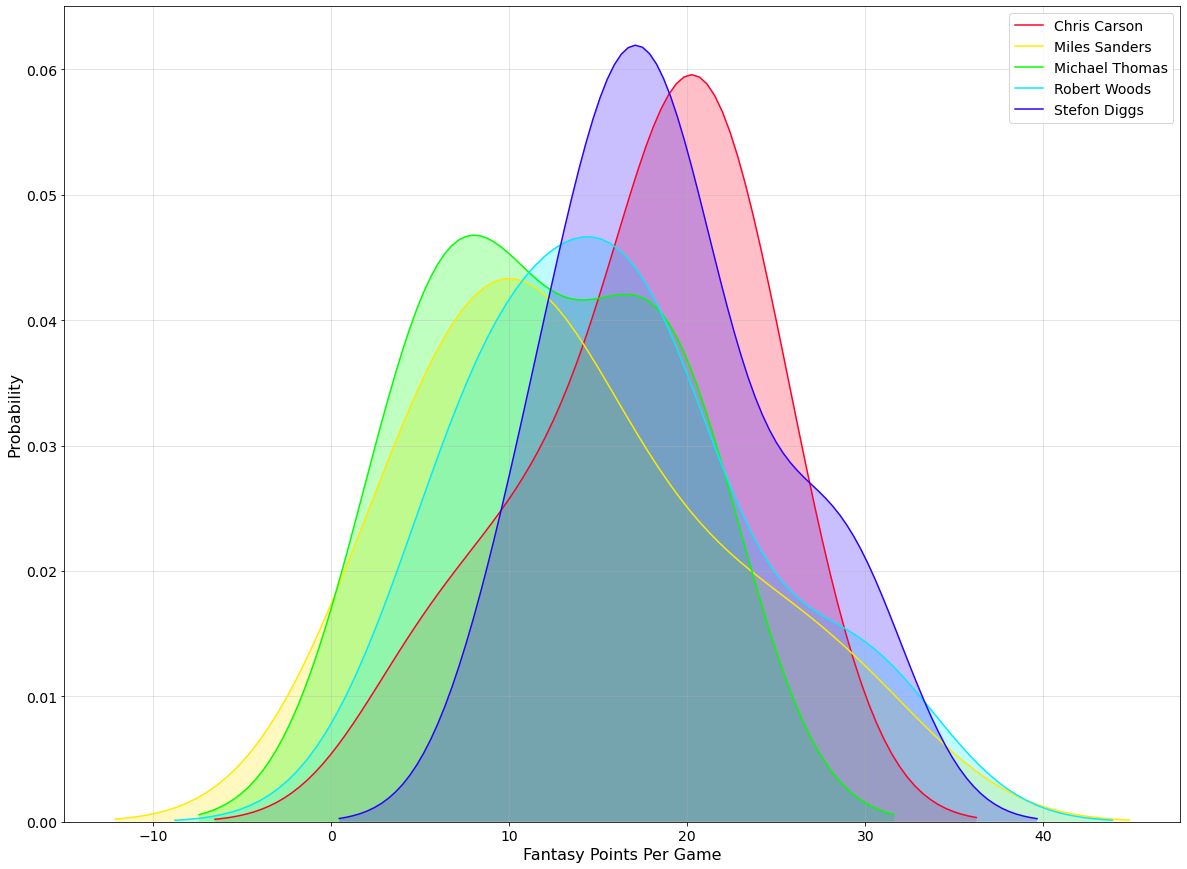

In [146]:
# data from 2020 only
df2020 = df.loc[df['year'] == 2020]
player_list = ['Chris Carson', 'Miles Sanders', 'Michael Thomas', 'Robert Woods', 'Stefon Diggs']
make_kde_plot(df2020, player_list)

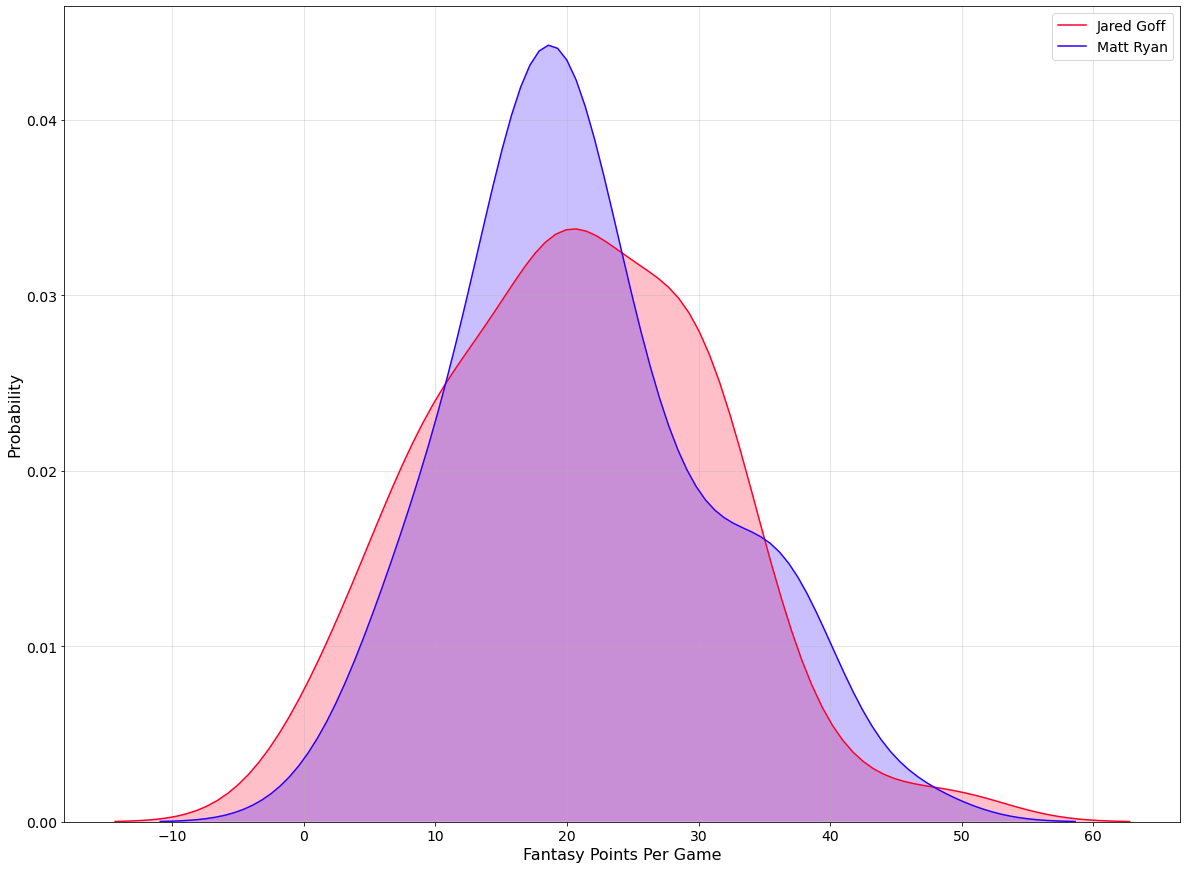

In [147]:
qb_list = ['Jared Goff', 'Matt Ryan']
make_kde_plot(df, qb_list)

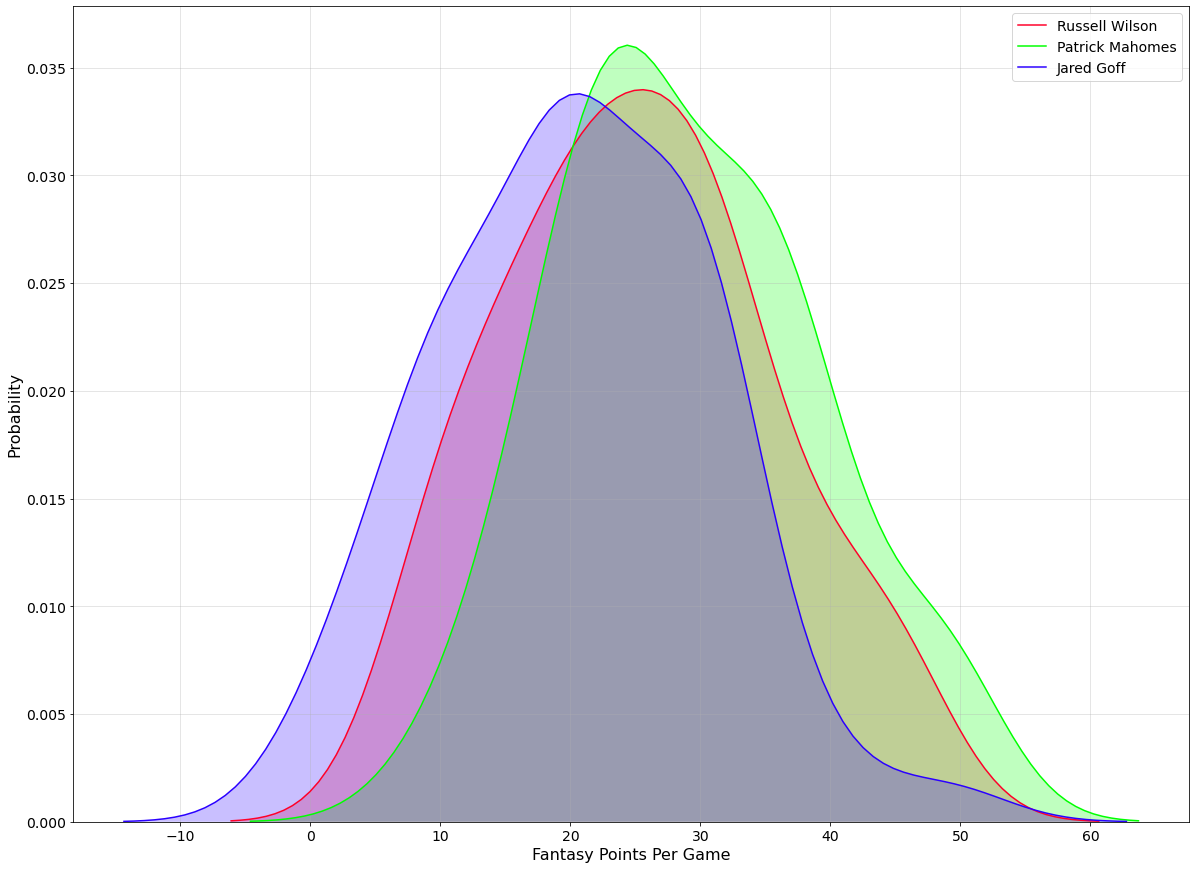

In [150]:
qb_list = ['Russell Wilson', 'Patrick Mahomes', 'Jared Goff']
make_kde_plot(df, qb_list)

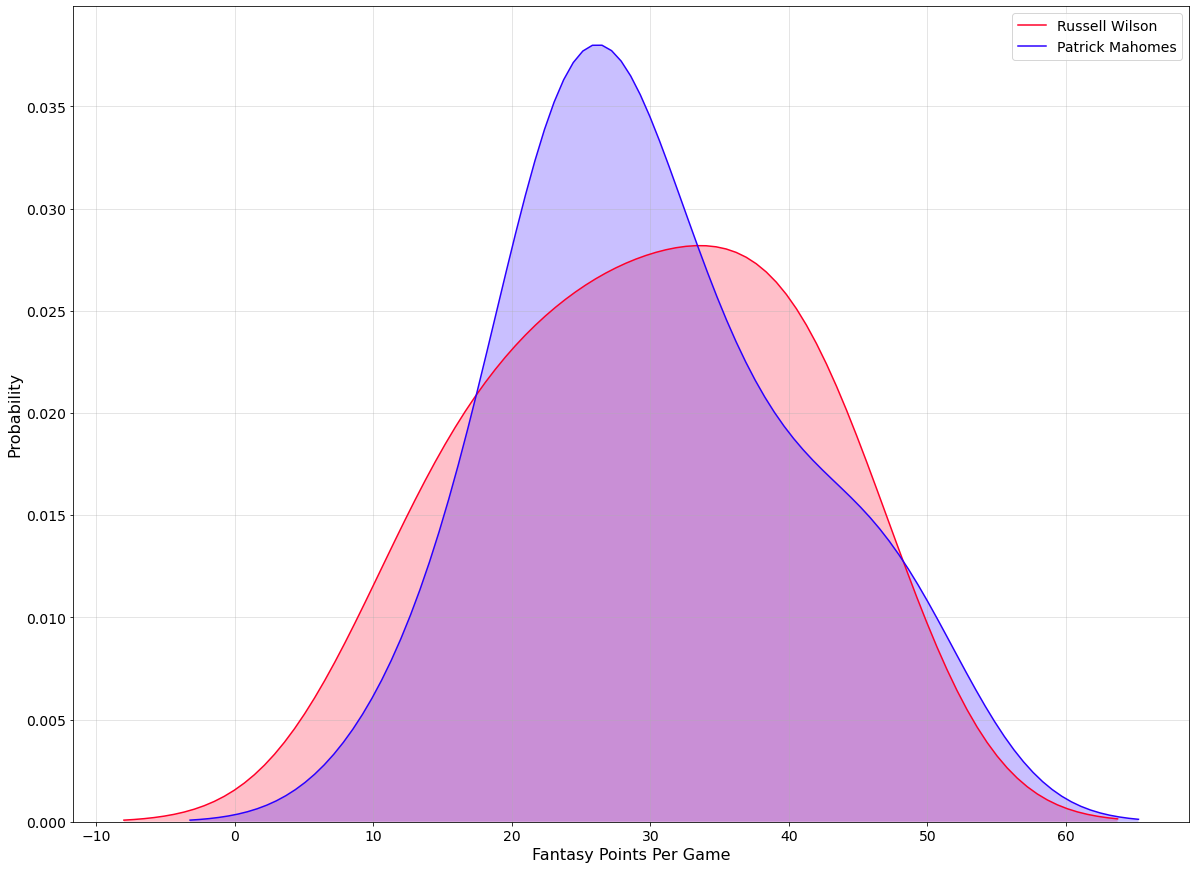

In [149]:
# 2020 only
make_kde_plot(df2020, qb_list)

In [119]:
player_id = 'CookDa01'

In [127]:
import requests
from bs4 import BeautifulSoup

def player_soup_grab(last_name_letter, player_id, year):
    """Grabs a soup object for week by week fantasy stats""" 
    season_url = f'https://www.pro-football-reference.com/players/{last_name_letter}/{player_id}/gamelog/{year}/'
    r_player = requests.get(season_url)
    soup = BeautifulSoup(r_player.content, 'html.parser')
    return soup

def player_name_and_pos_grab(soup): 
    """Parses a soup object for a player's name and position """ 
    p = soup.find_all('p') 
    for i in p:
        if 'Position' in str(i):
            pos = str(i.get_text()).split()[1]
            break
        else:
            pos = '-'
    player_name = soup.find_all('h1')[0].get_text().rstrip().strip('\n')
    return player_name, pos

def player_table_grab(soup):
    """Grabs the first table in a given soup object and returns a dataframe"""
    player_table = soup.find_all('table')
    df = pd.read_html(str(player_table))[0]
    return df

In [121]:
soup = player_soup_grab('C', player_id, 2020)

In [128]:
name, pos = player_name_and_pos_grab(soup)

In [123]:
table = player_table_grab(soup)

In [124]:
table.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 G#               Week   
0                1.0         2020-09-13                1.0                1.0   
1                2.0         2020-09-20                2.0                2.0   
2                3.0         2020-09-27                3.0                3.0   
3                4.0         2020-10-04                4.0                4.0   
4                5.0         2020-10-11                5.0                5.0   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                 Age                 Tm Unnamed: 6_level_1                Opp   
0             25.034                MIN                NaN                GNB   
1             25.041                MIN                  @                IND   
2             25.048                MIN                NaN                TEN   
3             25.055                MIN                  @                HOU   
4             25.062                MIN                  @                SEA   

  Unnamed: 8_level_0 Unnamed: 9_level_0  ... Fumbles           Off. Snaps  \
              Result                 GS  ...      FF FR Yds TD        Num   
0            L 34-43                  *  ...       0  0   0  0       30.0   
1            L 11-28                  *  ...       0  0   0  0       43.0   
2            L 30-31                  *  ...       0  0   0  0       48.0   
3            W 31-23                  *  ...       0  0   0  0       49.0   
4            L 26-27                  *  ...       0  0   0  0       36.0   

       Def. Snaps     ST Snaps      
   Pct        Num Pct      Num Pct  
0  58%        0.0  0%      0.0  0%  
1  80%        0.0  0%      0.0  0%  
2  74%        0.0  0%      0.0  0%  
3  74%        0.0  0%      0.0  0%  
4  41%        0.0  0%      0.0  0%  

[5 rows x 36 columns]

In [129]:
name

'Dalvin Cook'

In [131]:
raw2020 = pd.read_csv(r'C:\Users\rmull\Python-Projects\fantasy-football\data\game-by-game\2020_weekly.csv')

In [132]:
raw2020.head()

,player_id,player_name,pos,year,date,week,age,tm,home/away,opp,...,rushing_td,receiving_tgt,receiving_rec,receiving_yds,receiving_y/r,receiving_td,receiving_y/tgt,scoring_2pm,fumbles,fumbles_lost
0,CookDa01,\nDalvin Cook,RB,2020,2020-09-13,1.0,25.034,MIN,Home,GNB,...,2.0,2.0,1.0,-2.0,-2.0,0.0,-1.0,2.0,0.0,0.0
1,CookDa01,\nDalvin Cook,RB,2020,2020-09-20,2.0,25.041,MIN,Away,IND,...,1.0,2.0,2.0,8.0,4.0,0.0,4.0,1.0,0.0,0.0
2,CookDa01,\nDalvin Cook,RB,2020,2020-09-27,3.0,25.048,MIN,Home,TEN,...,1.0,5.0,2.0,18.0,9.0,0.0,3.6,0.0,1.0,1.0
3,CookDa01,\nDalvin Cook,RB,2020,2020-10-04,4.0,25.055,MIN,Away,HOU,...,2.0,2.0,2.0,16.0,8.0,0.0,8.0,0.0,0.0,0.0
4,CookDa01,\nDalvin Cook,RB,2020,2020-10-11,5.0,25.062,MIN,Away,SEA,...,1.0,5.0,5.0,24.0,4.8,0.0,4.8,0.0,0.0,0.0


In [134]:
raw2020['player_name'] = raw2020['player_name'].replace({'\n': ''}, regex=True)

In [135]:
raw2020.to_csv(r'C:\Users\rmull\Python-Projects\fantasy-football\data\game-by-game\2020_weekly.csv', index=False)